# Sentences about strings
Sentences about strings are a demo domain for semantic grammars, where sentences are true
or false as descriptions of strings.  
## Base grammar including *follows*

In [33]:
import nltk
from nltk import grammar, parse

In [34]:
nltk.data.show_cfg('/local/teach/cl21/grammar/h3b.fcfg')

% start S
# Grammar Rules
S[SEM=<?subj(?vp)>] -> DP[SEM=?subj] VP[SEM=?vp]
S[SEM=<?vp(?subj)>] -> NP[SEM=?subj] VP[SEM=?vp]
DP[ SEM=<?X(?P)>] -> Det[SEM=?X] N[SEM=?P] 
VP[SEM=?Q] -> 'is' A[SEM=?Q]
# This is included for testing.
VP[SEM=<\x.offend(x)>] -> 'offends'
# Transitive verb with individual object.
VP[ SEM=<?R(?n)>] -> TV[SEM=?R] NP[SEM=?n]
# Transitive verb with quantifier object.
# The object is given minimal scope.
VP[ SEM=<\m.?X(\n.(?R(n)(m)))>] -> TV[SEM=?R] DP[SEM=?X]
# Lexical Rules
A[SEM=<\n.exists c.(vowel(c) & char(n,c))>] -> 'vocalic'
Det[SEM=<\P Q.all n.(P(n) -> Q(n))>] -> 'every'
Det[SEM=<\P Q.exists n.(P(n) & Q(n))>] -> 'a'
Det[SEM=<\P Q.exists n.(P(n) & Q(n))>] -> 'some'
N[SEM=<\n.char(n,leti)>] -> 'i'
N[SEM=<\n.char(n,lete)>] -> 'e'
N[SEM=<\n.char(n,letu)>] -> 'u'
N[SEM=<\n.char(n,letp)>] -> 'p'
N[SEM=<\n.char(n,lett)>] -> 't'
N[SEM=<\n.char(n,letk)>] -> 'k'
N[SEM=<\n.exists c.char(n,c)>] -> 'letter'
NP[SEM=<1>] -> 'letter' 'one'
NP[SEM=<2>] -> 'letter' 'two'
NP[

This function parses a whitespace separated sentence `s` using a parser `p`, and displays
the trees graphically or as labeled bracketings. Specify`graphic=False` if graphics don't
work in your notebook.

In [35]:
def parse_and_display(s, p, graphic:bool=True):
   for tree in p.parse(s.split()): 
    if graphic: 
        display(tree) 
    else: print(tree)

##### Minimal example with *follows* and token characters as subject and object

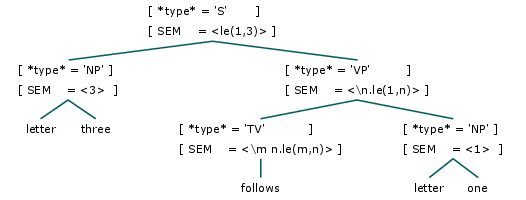

In [36]:
from nltk.parse.util import load_parser
pr = load_parser('/local/teach/cl21/grammar/h3b.fcfg', trace=0,cache=False)
parse_and_display('letter three follows letter one',pr)

In [37]:
parse_and_display('letter one follows letter three',pr,False)

(S[SEM=<le(3,1)>]
  (NP[SEM=<1>] letter one)
  (VP[SEM=<\n.le(3,n)>]
    (TV[SEM=<\m n.le(m,n)>] follows)
    (NP[SEM=<3>] letter three)))


##### Minimal two-word sentence

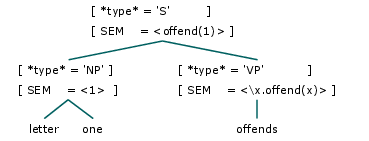

In [38]:
parse_and_display('letter one offends',pr)

In [39]:
parse_and_display('a t follows letter one',pr,False)

(S[SEM=<exists n.(char(n,lett) & le(1,n))>]
  (DP[SEM=<\Q.exists n.(char(n,lett) & Q(n))>]
    (Det[SEM=<\P Q.exists n.(P(n) & Q(n))>] a)
    (N[SEM=<\n.char(n,lett)>] t))
  (VP[SEM=<\n.le(1,n)>]
    (TV[SEM=<\m n.le(m,n)>] follows)
    (NP[SEM=<1>] letter one)))


##### Idiom for naming a parse tree

##### DP (quantified nominal) in object position
This production fits the DP semantics in using a dummy variable
*m* in the subject position.  It scopes the DP over just the verb.
```
VP[ SEM=<\m.?X(\n.(?R(n)(m)))>] -> TV[SEM=?R] DP[SEM=?X]
```

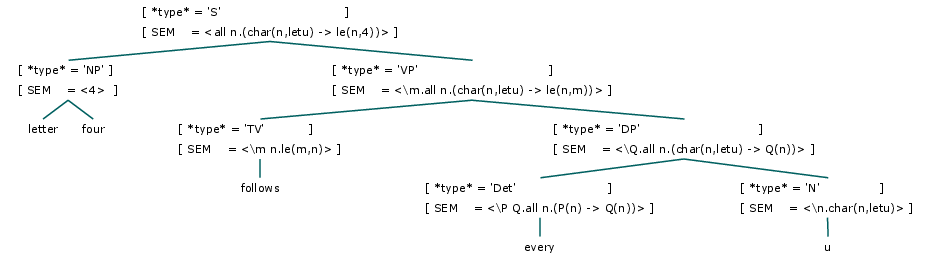

In [40]:
parse_and_display('letter four follows every u',pr)

## Truth checking

In [41]:
v = """
1 => 1
2 => 2
3 => 3
4 => 4
5 => 5
leti => i
lete => e
letu => u
letp => p
lett => t
letk => k
vowel => {i, e, u}
char => {(1,t), (2,u), (3, t),(4,u),(5,k)}
le => {(1,2),(1,3),(1,4),(1,5),(2,3),(2,4),(2,5),(3,4),(3,5),(4,5)}
"""
    

In [42]:
val = nltk.Valuation.fromstring(v)
model_tutuk = nltk.Model(val.domain, val)
print(model_tutuk)
ass = nltk.Assignment(val.domain)

Domain = {'3', 'k', 'u', 'e', '4', 't', 'i', 'p', '1', '2', '5'},
Valuation = 
{'1': '1',
 '2': '2',
 '3': '3',
 '4': '4',
 '5': '5',
 'char': {('2', 'u'), ('4', 'u'), ('5', 'k'), ('1', 't'), ('3', 't')},
 'le': {('1', '2'),
        ('1', '3'),
        ('1', '4'),
        ('1', '5'),
        ('2', '3'),
        ('2', '4'),
        ('2', '5'),
        ('3', '4'),
        ('3', '5'),
        ('4', '5')},
 'lete': 'e',
 'leti': 'i',
 'letk': 'k',
 'letp': 'p',
 'lett': 't',
 'letu': 'u',
 'vowel': {('e',), ('i',), ('u',)}}


In [43]:
s1 = 'letter three follows letter one'.split()
f1=next(pr.parse(s1)).label()['SEM']
print(f1)
model_tutuk.evaluate(str(f1),ass)

le(1,3)


True

In [44]:
s3 = 'every u follows letter one'.split()
f3=next(pr.parse(s3)).label()['SEM']
print(f3)
model_tutuk.evaluate(str(f3),ass)

all n.(char(n,letu) -> le(1,n))


True

In [45]:
s4 = 'every t follows letter one'.split()
f4=next(pr.parse(s4)).label()['SEM']
print(f4)
model_tutuk.evaluate(str(f4),ass)

all n.(char(n,lett) -> le(1,n))


False

In [46]:
s3 = 'every u follows letter one'.split()
f3=next(pr.parse(s3)).label()['SEM']
print(f3)
model_tutuk.evaluate(str(f3),ass)

all n.(char(n,letu) -> le(1,n))


True

In [47]:
s4 = 'every t follows letter one'.split()
f4=next(pr.parse(s4)).label()['SEM']
print(f4)
model_tutuk.evaluate(str(f4),ass)

all n.(char(n,lett) -> le(1,n))


False

## Model creation
This is Angela Liu's code for flexibly mapping a string to a string form of a model.

In [17]:
from typing import Callable, List, Set

def to_model_str(word: str, special_rels: List[Callable[[str], str]]=[]) -> str:
    """
    Creates the string form of the model for the input word. This string is meant to be passed to `nltk.Valuation.fromstring`.
    By default, the function will only add the relations mapping i => i for i from 1 to the length of `word` and a relation 
    mapping char => the set of tuples (i, word[i]). The `special_rels` function allows you to specify additional relations to 
    be added to the valuation string.
    
    :param word: The word to create a model string for.
    :param special_rels: A list of functions that when called return a string of the form {relation_name} => {relation_contents}. Defaults to the empty list.
    :returns: a string representing the model for word
    """
    n = len(word)
    model_str = []
    char = []
    for i in range(1, n+1):
        model_str.append(f'{i} => {i}')
        char.append((i, word[i-1]))
    model_str.append(f'char => {set(char)}'.lower())
    return '\n'.join(model_str + [rel(word) for rel in special_rels]).replace("'", "")
# Angela Liu

The argument `special_rels` is used to introduce relation symbols such as *le*, *vowel*, or *capital*.

In [18]:
import re
get_vowel = lambda w: f'vowel => {set(re.findall(r"[AEIOUaeiou]", w))}'.lower()
get_cons = lambda w: 'cons => {}'.format(set(re.findall(r"[^AEIOUaeiou\W0-9]", w))).lower()
follows = lambda w: f'le => {set([(i+1,j+1) for i in range(len(w)) for j in range(i, len(w)) if i != j])}'
get_capital = lambda w: f'capital => {set([m.span()[0] + 1 for m in re.finditer(r"[A-Z]", w)])}'
# Angela Liu

This function fixes a problems with the representation of the empty set in valuations.

In [19]:
def emptysets(val:nltk.sem.evaluate.Valuation):
  val.update([(k,set()) for (k,v) in val.items() if v == 'set()'])

#### Example of model construction

In [20]:
words = ['cat', 'mAtch', 'peRiLOuS']
vals = [nltk.Valuation.fromstring(to_model_str(w, [get_vowel, get_cons, follows, get_capital])) for w in words]
for v in vals: emptysets(v)
models = [nltk.Model(val.domain, val) for val in vals]
for w, m in zip(words, models):
    print(f'{w}\n----------------\n{m}\n')
# Angela Liu

cat
----------------
Domain = {'3', 'c', 't', '1', '2', 'a'},
Valuation = 
{'1': '1',
 '2': '2',
 '3': '3',
 'capital': set(),
 'char': {('3', 't'), ('2', 'a'), ('1', 'c')},
 'cons': {('t',), ('c',)},
 'le': {('1', '2'), ('1', '3'), ('2', '3')},
 'vowel': {('a',)}}

mAtch
----------------
Domain = {'3', 'c', 'h', 'a', 'm', '4', 't', '1', '2', '5'},
Valuation = 
{'1': '1',
 '2': '2',
 '3': '3',
 '4': '4',
 '5': '5',
 'capital': {('2',)},
 'char': {('5', 'h'), ('1', 'm'), ('2', 'a'), ('4', 'c'), ('3', 't')},
 'cons': {('t',), ('m',), ('c',), ('h',)},
 'le': {('1', '2'),
        ('1', '3'),
        ('1', '4'),
        ('1', '5'),
        ('2', '3'),
        ('2', '4'),
        ('2', '5'),
        ('3', '4'),
        ('3', '5'),
        ('4', '5')},
 'vowel': {('a',)}}

peRiLOuS
----------------
Domain = {'3', '8', 's', 'u', 'o', '6', 'e', 'i', '4', 'r', 'l', 'p', '1', '2', '7', '5'},
Valuation = 
{'1': '1',
 '2': '2',
 '3': '3',
 '4': '4',
 '5': '5',
 '6': '6',
 '7': '7',
 '8': '8',
 'cap

## Example solutions for ps2
The problems in problem set 2 ask us to define the syntax and semantics of
particular words and/or constructions.  This normally entails adding one
or more lexical productions to the grammar, but also could involve adding
non-lexical productions.

### Example problem 1
Define the syntax and semantics of *non-* as used in this sentence.
Treat it as a separate word.

*letter two is non- vocalic*

### Example solution 1
The solution is given as a sequence of cells, some of which are Markup cells,
and others code cells.  The markup cells should explain the strategy and 
comment on the examples.

These are my example words, and the intuitive truth values of sentence s1 as a description
of these words.

In [48]:
e0 = [('emu',True),('bat',False)]
s0 = 'letter two is non- vocalic'

I defined *non-* as an Adv (adverb), using these productions. The Adv is semantically the function.
The adverb `non-` semantically takes the complement of the input adjective.
```
A[SEM=<?f(?P)>] -> Adv[SEM=?f] A[SEM=?P]
ADV[SEM=<\P x.-P(x)>] -> 'non-'
```

This is the tree for the target sentence.

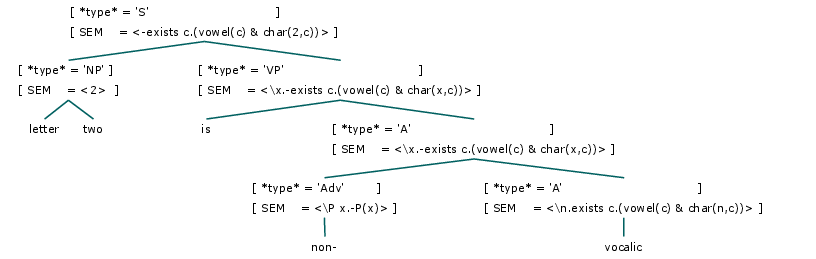

In [49]:
pr1 = load_parser('/local/teach/cl21/grammar/h3b0.fcfg', trace=0,cache=False)
parse_and_display(s0,pr1)

In [78]:
print(pr1.grammar())

Grammar with 27 productions (start state = S[])
    S[SEM=<?subj(?vp)>] -> DP[SEM=?subj] VP[SEM=?vp]
    S[SEM=<?vp(?subj)>] -> NP[SEM=?subj] VP[SEM=?vp]
    DP[SEM=<?X(?P)>] -> Det[SEM=?X] N[SEM=?P]
    VP[SEM=?Q] -> 'is' A[SEM=?Q]
    VP[SEM=<\x.offend(x)>] -> 'offends'
    VP[SEM=<?R(?n)>] -> TV[SEM=?R] NP[SEM=?n]
    VP[SEM=<\m.?X(\n.?R(n,m))>] -> TV[SEM=?R] DP[SEM=?X]
    A[SEM=<?f(?P)>] -> Adv[SEM=?f] A[SEM=?P]
    A[SEM=<\n.exists c.(vowel(c) & char(n,c))>] -> 'vocalic'
    Det[SEM=<\P Q.all n.(P(n) -> Q(n))>] -> 'every'
    Det[SEM=<\P Q.exists n.(P(n) & Q(n))>] -> 'a'
    Det[SEM=<\P Q.exists n.(P(n) & Q(n))>] -> 'some'
    Det[SEM=<\P Q.exists n.(P(n) & Q(n) & all m.((P(m) & Q(m)) -> eq(m,n)))>] -> 'exactly' 'one'
    N[SEM=<\n.char(n,leti)>] -> 'i'
    N[SEM=<\n.char(n,lete)>] -> 'e'
    N[SEM=<\n.char(n,letu)>] -> 'u'
    N[SEM=<\n.char(n,letp)>] -> 'p'
    N[SEM=<\n.char(n,lett)>] -> 't'
    N[SEM=<\n.char(n,letk)>] -> 'k'
    N[SEM=<\n.exists c.char(n,c)>] -> 'letter'
   

This defines the formula.

In [53]:
pr0 = load_parser('/local/teach/cl21/grammar/h3b0.fcfg', trace=0,cache=False)
f0 = next(pr0.parse(s0.split())).label()['SEM']
print(f0)

-exists c.(vowel(c) & char(2,c))


This constructs the models.

In [54]:
words = [e[0] for e in e0]
truths = [e[1] for e in e0]
vals = [nltk.Valuation.fromstring(to_model_str(w, [get_vowel, follows])) for w in words]
assignments = [nltk.Assignment(val.domain) for val in vals]
for val in vals: emptysets(val)
models = [nltk.Model(val.domain, val) for val in vals]

This evaluates formula `f0` in the three models.  The results are as desired.  The
second and third models have a non-vocalic character in position two.

In [55]:
print(f'{s0}\n---------------')
for w, a, m in zip(words, assignments, models):
    print(f'{w}\n{m.evaluate(str(f0),a)}\n----------------')

letter two is non- vocalic
---------------
emu
True
----------------
bat
False
----------------


### Example problem 2
Define the syntax and semantics of *exactly one* as used in this sentence.

*exactly one letter is vocalic*

### Example solution 2

These are my example words, and the intuitive truth values of sentence s1 as a description
of these words.

In [67]:
e1 = [('au',False),('at',True),('pt',False)]
s1 = 'exactly one letter is vocalic'

This defines the formula labeling root of the parse tree for `s1`.

In [68]:
pr1 = load_parser('/local/teach/cl21/grammar/h3b0.fcfg', trace=0,cache=False)
f1 = next(pr0.parse(s1.split())).label()['SEM']
print(f1)

exists n.(exists c.char(n,c) & exists c.(vowel(c) & char(n,c)) & all m.((exists c.char(m,c) & exists c.(vowel(c) & char(m,c))) -> eq(m,n)))


This constructs the models.

In [69]:
words = [e[0] for e in e1]
truths = [e[1] for e in e1]
equals = lambda w: f'eq => {set([(i+1,i+1) for i in range(len(w))])}'
vals = [nltk.Valuation.fromstring(to_model_str(w, [get_vowel, follows, equals])) for w in words]
assignments = [nltk.Assignment(val.domain) for val in vals]
for val in vals: emptysets(val)
models = [nltk.Model(val.domain, val) for val in vals]

This evaluates formula `f1` in the three models.  The results are as desired.  Only the middle word
has exactly one vowel.

In [70]:
print(f'{s1}\n---------------')
for w, a, m in zip(words, assignments, models):
    print(f'{w}\n{m.evaluate(str(f1),a)}\n----------------')

exactly one letter is vocalic
---------------
au
False
----------------
at
True
----------------
pt
False
----------------


I defined *exactly one* as a determiner, using a production with this syntax.
```
Det[] -> 'exactly' 'one'
```
The idea for that semantics is that there should be some token character that
satisfies the N and the VP, but there should not be an additional, different
token character which also satifies them. This is expressed using a two-place
relation *eq*, which is understood to be the equality relation on numbers.
```
Det[SEM=<\P Q.exists n.(P(n) & Q(n) & all m.((P(m) & Q(m)) -> eq(m,n)))>] -> 'exactly' 'one'
```
This is the tree for the target sentence.

In [ ]:
parse_and_display(s1,pr1)

## Generate

In [71]:
g = pr.grammar()
from nltk.parse.generate import generate

In [72]:
print(g)

Grammar with 24 productions (start state = S[])
    S[SEM=<?subj(?vp)>] -> DP[SEM=?subj] VP[SEM=?vp]
    S[SEM=<?vp(?subj)>] -> NP[SEM=?subj] VP[SEM=?vp]
    DP[SEM=<?X(?P)>] -> Det[SEM=?X] N[SEM=?P]
    VP[SEM=?Q] -> 'is' A[SEM=?Q]
    VP[SEM=<\x.offend(x)>] -> 'offends'
    VP[SEM=<?R(?n)>] -> TV[SEM=?R] NP[SEM=?n]
    VP[SEM=<\m.?X(\n.?R(n,m))>] -> TV[SEM=?R] DP[SEM=?X]
    A[SEM=<\n.exists c.(vowel(c) & char(n,c))>] -> 'vocalic'
    Det[SEM=<\P Q.all n.(P(n) -> Q(n))>] -> 'every'
    Det[SEM=<\P Q.exists n.(P(n) & Q(n))>] -> 'a'
    Det[SEM=<\P Q.exists n.(P(n) & Q(n))>] -> 'some'
    N[SEM=<\n.char(n,leti)>] -> 'i'
    N[SEM=<\n.char(n,lete)>] -> 'e'
    N[SEM=<\n.char(n,letu)>] -> 'u'
    N[SEM=<\n.char(n,letp)>] -> 'p'
    N[SEM=<\n.char(n,lett)>] -> 't'
    N[SEM=<\n.char(n,letk)>] -> 'k'
    N[SEM=<\n.exists c.char(n,c)>] -> 'letter'
    NP[SEM=<1>] -> 'letter' 'one'
    NP[SEM=<2>] -> 'letter' 'two'
    NP[SEM=<3>] -> 'letter' 'three'
    NP[SEM=<4>] -> 'letter' 'four'
    NP

In [73]:
for sentence in generate(g, n=100, depth=6):
...     print(' '.join(sentence))

every i is vocalic
every i offends
every i follows letter one
every i follows letter two
every i follows letter three
every i follows letter four
every i follows letter five
every i follows every i
every i follows every e
every i follows every u
every i follows every p
every i follows every t
every i follows every k
every i follows every letter
every i follows a i
every i follows a e
every i follows a u
every i follows a p
every i follows a t
every i follows a k
every i follows a letter
every i follows some i
every i follows some e
every i follows some u
every i follows some p
every i follows some t
every i follows some k
every i follows some letter
every e is vocalic
every e offends
every e follows letter one
every e follows letter two
every e follows letter three
every e follows letter four
every e follows letter five
every e follows every i
every e follows every e
every e follows every u
every e follows every p
every e follows every t
every e follows every k
every e follows every le